# Bid or Buy EDA

Step 1: import all csv files, concatenate and dedupe

In [1]:
import glob
%matplotlib inline 

import pandas as pd
import pandasql
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import seaborn as sns
from os import path
from wordcloud import WordCloud, STOPWORDS
import sys

pd.options.display.mpl_style = 'default'

/home/matthew/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
path =r'/home/matthew/Downloads' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)

frame = pd.concat(list_)


frame2 = frame.drop('Unnamed: 0', 1)

base = pd.DataFrame.drop_duplicates(frame2) #dedupe

base['sellers'] = base['buyer']
base = base.drop('buyer', 1)

base['cat3']=base['cat3'].fillna('n/a')
base['cat2']=base['cat2'].fillna('n/a')


base['c123'] = base['cat1'] + 'll' + base['cat2']  + 'll' + base['cat3']

/home/matthew/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
sellers = pd.read_csv('sellers.csv')
base = pd.merge(base, sellers, on='sellers', how = 'left')
base.Dropshipper.fillna(0, inplace = True)
base.shape

(386354, 12)

# Category Analysis

In [4]:
base_cat = base.loc[(base.cat2 == 'Cell Phones & Smartphones') & (base.price > 1000)]

In [5]:
q = """SELECT  case when title like '%samsung%' then 'samsung'
                    when title like '%sony%' then 'sony'
                    when title like '%xiaomi%' then 'xiaomi'
                    when title like '%redmi%' then 'xiaomi'
                    when title like '%lenovo%' then 'lenovo'
                    when title like '%apple%' then 'apple'
                    when title like '%iphone%' then 'iphone'
                    when title like '%oneplus%' then 'oneplus'
                    when title like '%asus%' then 'asus'
                    when title like '%huawei%' then 'huawei'
                    when title like '%blackberry%' then 'blackberry'
                    when title like '%nokia%' then 'nokia'
                    when title like '%htc%' then 'htc_BG'
                    when title like '%caterpillar%' then 'caterpillar'
                    when title like '%lg%' then 'LG'
                    when title like '%google%' then 'Google'
                    when title like '%galaxy%' then 'samsung'
                    when title like '%hisense%' then 'hisense'
                    when title like '%letv%' then 'LeTV'
                    when title like '%meizu%' then 'Meizu'  
                    when title like '%doogee%' then 'DOOGEE'
                    when title like '%umi rome%' then 'umiRome' 
                    when title like '%umi super%' then 'umisuper'
                    when title like '%umi plus%' then 'umiplus'
                    when title like '%wileyfox%' then 'wileyfox'
                    when title like '%microsoft%' then 'microsoft'
                    when title like '%motorola%' then 'Motorola'   
                    when title like '%bluboo%' then 'Bluboo'
                    when title like '%vkworld%' then 'vkworld'
                    when title like '%oukitel%' then 'OUKITEL'
                    when title like '%mann zugg%' then 'MANN ZUG'
                    when title like '%snopow%' then 'snopow'
                    
                    when title like '%smartwatch%' then 'none'                                   
                    else 'none' end as make,
                    
                title,
                month,
                price,
                sellers,
                dropshipper
                
      FROM base_cat
      
      WHERE make not in ("none")
      
      ;"""
    
base_phone = pandasql.sqldf(q.lower(), locals())

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


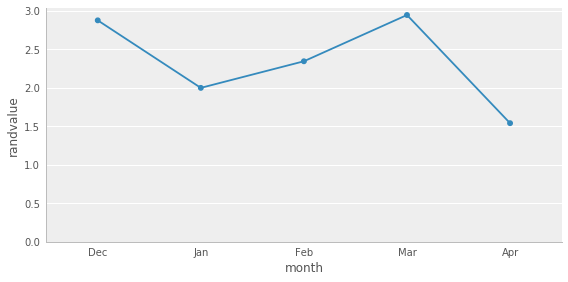

In [16]:
MS = """SELECT  sum(price)/1000000 as randvalue,
                            month
                
      FROM base_phone
      
      
      
      GROUP BY month
      
      ;"""
    
marketshare = pandasql.sqldf(MS.lower(), locals())
g = sns.factorplot(x="month", y="randvalue", x_order=['Dec','Jan', 'Feb','Mar', 'Apr'], set_ylim = 0, data=marketshare, size=4, aspect=2)
g.set(ylim=(0, None))

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


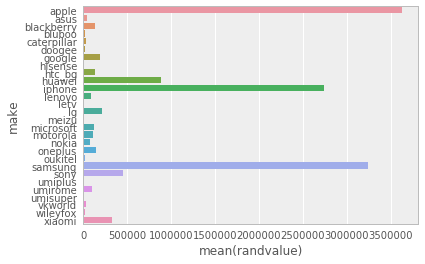

In [17]:
#overall, what are the top makes

x = """SELECT  sum(price) as randvalue, make
                
      FROM base_phone                
                 
    group by  
            make      
      ;"""
    
#marketshare.head()
brand = pandasql.sqldf(x.lower(), locals())
#
x = """SELECT  *
                
      FROM brand    where randvalue > 50000/1000            
   
      ;"""
    
#marketshare.head()
brand2 = pandasql.sqldf(x.lower(), locals())
#xiaomi_contained = xiaomi.loc[(Seller_share.randvalue > 15)]
#Seller_share.head(10)
sns.barplot(x="randvalue", y="make", data = brand2)  

/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


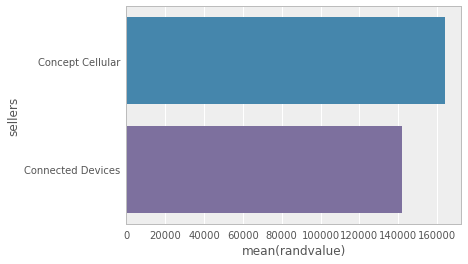

In [21]:
#overall, who are the top sellers of cellphones

x = """SELECT  sum(price) as randvalue, sellers
                
      FROM base_phone          where month like '%apr%'     
                 
    group by  
            sellers      
      ;"""
    
#marketshare.head()
brand = pandasql.sqldf(x.lower(), locals())
#
x = """SELECT  *
                
      FROM brand    where randvalue > 100000           
   
      ;"""
    
#marketshare.head()
brand2 = pandasql.sqldf(x.lower(), locals())
#xiaomi_contained = xiaomi.loc[(Seller_share.randvalue > 15)]
#Seller_share.head(10)
sns.barplot(x="randvalue", y="sellers", data = brand2)  

# Let's look at only BG phone sales market

Above is total marketshare of cellphone sales

I am only interested in phones I can get off Banggood - next SQL query focuses on this

In [22]:
BG = """SELECT  *
                
      FROM base_phone
      
      WHERE make in ("umi","xiaomi","LeTV","DOOGEE",
                      "LeTV","lenovo", "snopow", "MANN ZUG", "umiRome",
                        "vkworld","Bluboo","Meizu","oneplus", "umisuper" )      
      ;"""
    
bg_base = pandasql.sqldf(BG.lower(), locals())

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


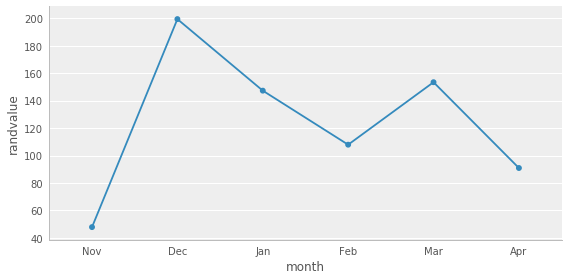

In [23]:
MS = """SELECT  sum(price)/1000 as randvalue,
                            month
                
      FROM bg_base
      
      GROUP BY month
      
      ;"""
    
marketshare = pandasql.sqldf(MS.lower(), locals())
sns.factorplot(x="month", y="randvalue", x_order=['Nov','Dec','Jan', 'Feb','Mar', 'Apr'], data=marketshare, size=4, aspect=2)

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


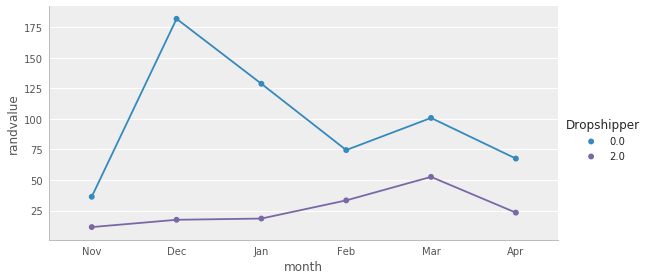

In [24]:
MS = """SELECT  sum(price)/1000 as randvalue,
                            month,
                            Dropshipper
                
      FROM bg_base
      
      GROUP BY month, Dropshipper
      
      ;"""
    
marketshare = pandasql.sqldf(MS.lower(), locals())
sns.factorplot(x="month", y="randvalue", hue = 'Dropshipper', x_order=['Nov','Dec','Jan', 'Feb','Mar', 'Apr'], data=marketshare, size=4, aspect=2)

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


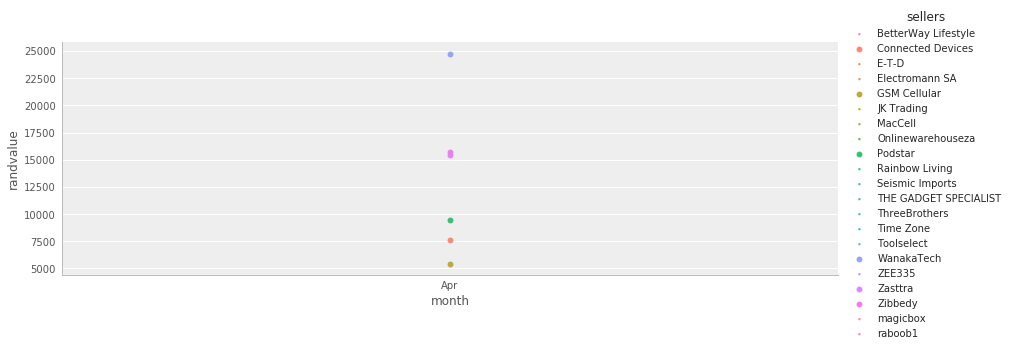

In [25]:
#overall, who are the top sellers of BG cellphones

x = """SELECT  sum(price) as randvalue, sellers, month
                
      FROM bg_base               
                 
    group by  
            sellers, month      
      ;"""
    
#marketshare.head()
brand = pandasql.sqldf(x.lower(), locals())
#
x = """SELECT  *
                
      FROM brand    where randvalue > 5000           
   
      ;"""
    
#marketshare.head()
brand2 = pandasql.sqldf(x.lower(), locals())
#xiaomi_contained = xiaomi.loc[(Seller_share.randvalue > 15)]
#Seller_share.head(10)
sns.factorplot(x="month", y="randvalue", hue="sellers", x_order=[ 'Apr'], size=4, aspect=3, data = brand2)  

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


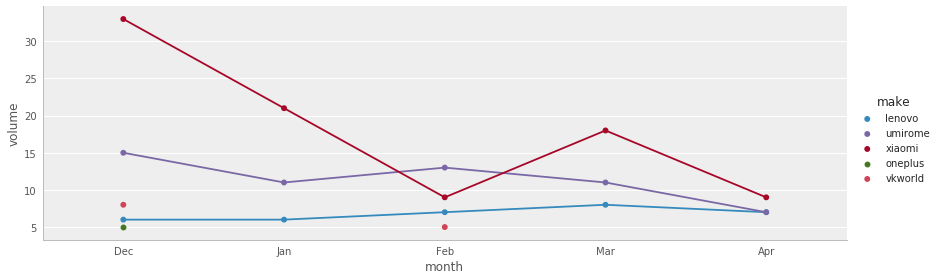

In [26]:
MS = """SELECT  count(*) as volume,
                            month,
                            make
                
      FROM bg_base
      
      
      GROUP BY month, make
      
      ;"""
    
marketshare = pandasql.sqldf(MS.lower(), locals())

marketshare1 = marketshare.loc[marketshare.volume > 4]
sns.factorplot(x="month", y="volume", hue = 'make', x_order=['Dec','Jan', 'Feb','Mar','Apr'], data=marketshare1, size=4, aspect=3)

#where make not in ("umisuper","meizu","letv")

In [27]:
q = """SELECT  count(*) as volume,
                sum(price)/count(*) as avg_price,
                make
                
      FROM bg_base where month like '%apr%'
      
      group by make

      
      ;"""
    
marketshare = pandasql.sqldf(q.lower(), locals())
marketshare

,volume,avg_price,make
0,1,1900.000000,bluboo
1,7,2316.142857,lenovo
2,1,1300.000000,meizu
3,4,8274.500000,oneplus
4,7,1512.571429,umirome
5,9,3092.666667,xiaomi


/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


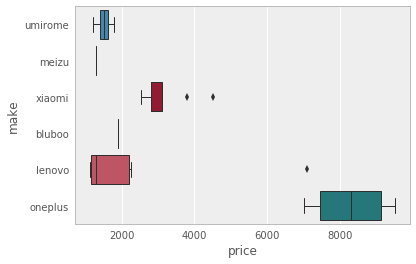

In [29]:
price = """SELECT  price, make
                
      FROM bg_base where month like '%apr%'
      
      ;"""
    
pricing = pandasql.sqldf(price.lower(), locals())
sns.boxplot(y="make", x="price", data=pricing)

Cool, clearly of the banggood phones Xiaomi has greatest demand


only focus on xiaomi and let's see the sellers. We can use this information to see the leading sellers business models

/home/matthew/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3367: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)
/home/matthew/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


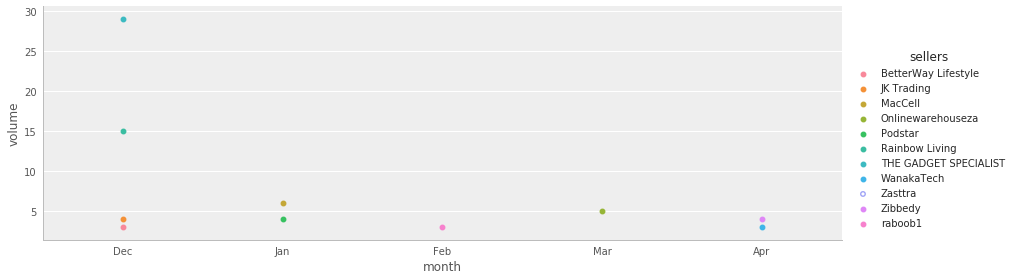

In [30]:
x = """SELECT  count(*) as volume, sellers, month
                
      FROM bg_base  where make like ('%xiaomi%')   
      
     
                 
    group by  
            sellers      
      ;"""
    
#marketshare.head()
xiaomi = pandasql.sqldf(x.lower(), locals())
xiaomi = xiaomi.loc[(xiaomi.volume > 2)]
#xiaomi_contained = xiaomi.loc[(Seller_share.randvalue > 15)]
#Seller_share.head(10)
sns.factorplot(x="month", y="volume", hue="sellers", x_order=['Dec','Jan', 'Feb','Mar', 'Apr'], size=4, aspect=3, data = xiaomi)  

In [42]:
t = """SELECT  *
                
      FROM bg_base   where make = ("xiaomi") 

      ;"""
    
#marketshare.head()
titles = pandasql.sqldf(t.lower(), locals())
titles

,make,title,month,price,sellers,Dropshipper
0,xiaomi,\n Xiaomi Redmi 4A 5.0-inch 2GB RAM 1...,Jan,1665.0,BetterWay Lifestyle,0.0
1,xiaomi,\n Xiaomi Redmi Note 4 3gb/64gb Gold ...,Jan,4950.0,Podstar,0.0
2,xiaomi,\n Xiaomi Redmi 3S Standard Edition 2...,Nov,3050.0,THE GADGET SPECIALIST,0.0
3,xiaomi,\n Xiaomi Redmi 2 Pro (FREE BLOOTOOTH...,Dec,2168.0,THE GADGET SPECIALIST,0.0
4,xiaomi,\n Xiaomi Mi Max 6.44 inch 4GB RAM 12...,Dec,5799.0,Rainbow Living,0.0
5,xiaomi,\n Xiaomi Mi4 5-inch 2GB RAM 16GB ROM...,Dec,2499.0,Rainbow Living,0.0
6,xiaomi,\n Xiaomi Redmi 3s 5 Inch Fingerprint...,Dec,2499.0,Rainbow Living,0.0
7,xiaomi,\n Xiaomi Mi Max 6.44 inch 3GB RAM 32...,Dec,3799.0,Rainbow Living,0.0
8,xiaomi,\n Xiaomi Redmi Note 3 Pro 5.5-inch 2...,Dec,2799.0,Rainbow Living,0.0
9,xiaomi,\n Xiaomi Redmi Note 4 Fingerprint 5....,Dec,3699.0,Rainbow Living,0.0
